# KAGGLE-NYC-AIRBNB

This Jupyter Notebook file contains parts of the code for the final project, but with added testing/debugging code and quick visualizations.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [3]:
data = pd.read_csv("AB_NYC_2019.csv", index_col=0)
print("Initial size:",len(data), "x", len(data.columns))
# Removing the columns with a lot (20%) of missing values
data = data.drop(columns=['last_review', 'reviews_per_month'])
# Removing the rows with some missing values (37 rows)
data = data.dropna()
data

Initial size: 48895 x 15


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27


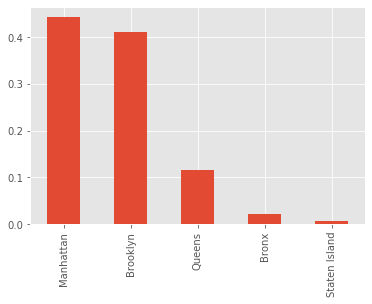

In [8]:
(data['neighbourhood_group'].value_counts()/sum(data['neighbourhood_group'].value_counts())).plot(kind='bar')

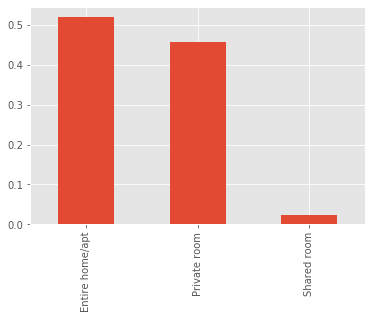

In [9]:
(data['room_type'].value_counts()/sum(data['room_type'].value_counts())).plot(kind='bar')

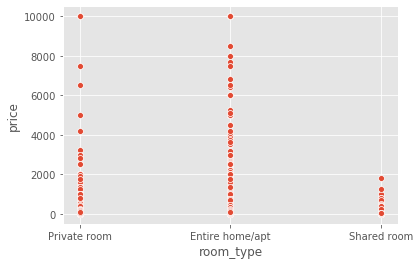

In [18]:
sns.scatterplot(x ="room_type", y ="price", data = data)

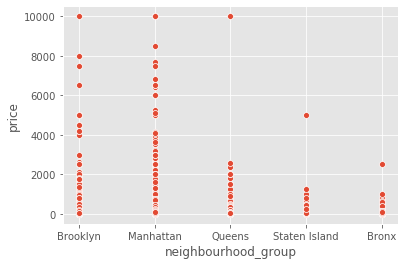

In [20]:
sns.scatterplot(x ="neighbourhood_group", y ="price", data = data)

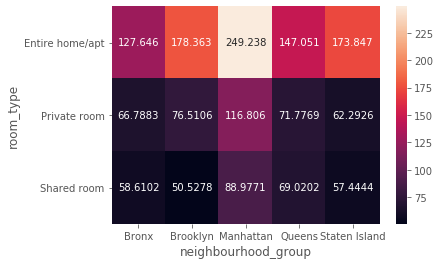

In [46]:
tab = pd.crosstab(data['room_type'],data['neighbourhood_group'], aggfunc='mean', values=data['price'])
sns.heatmap(tab,annot=True, fmt='g')

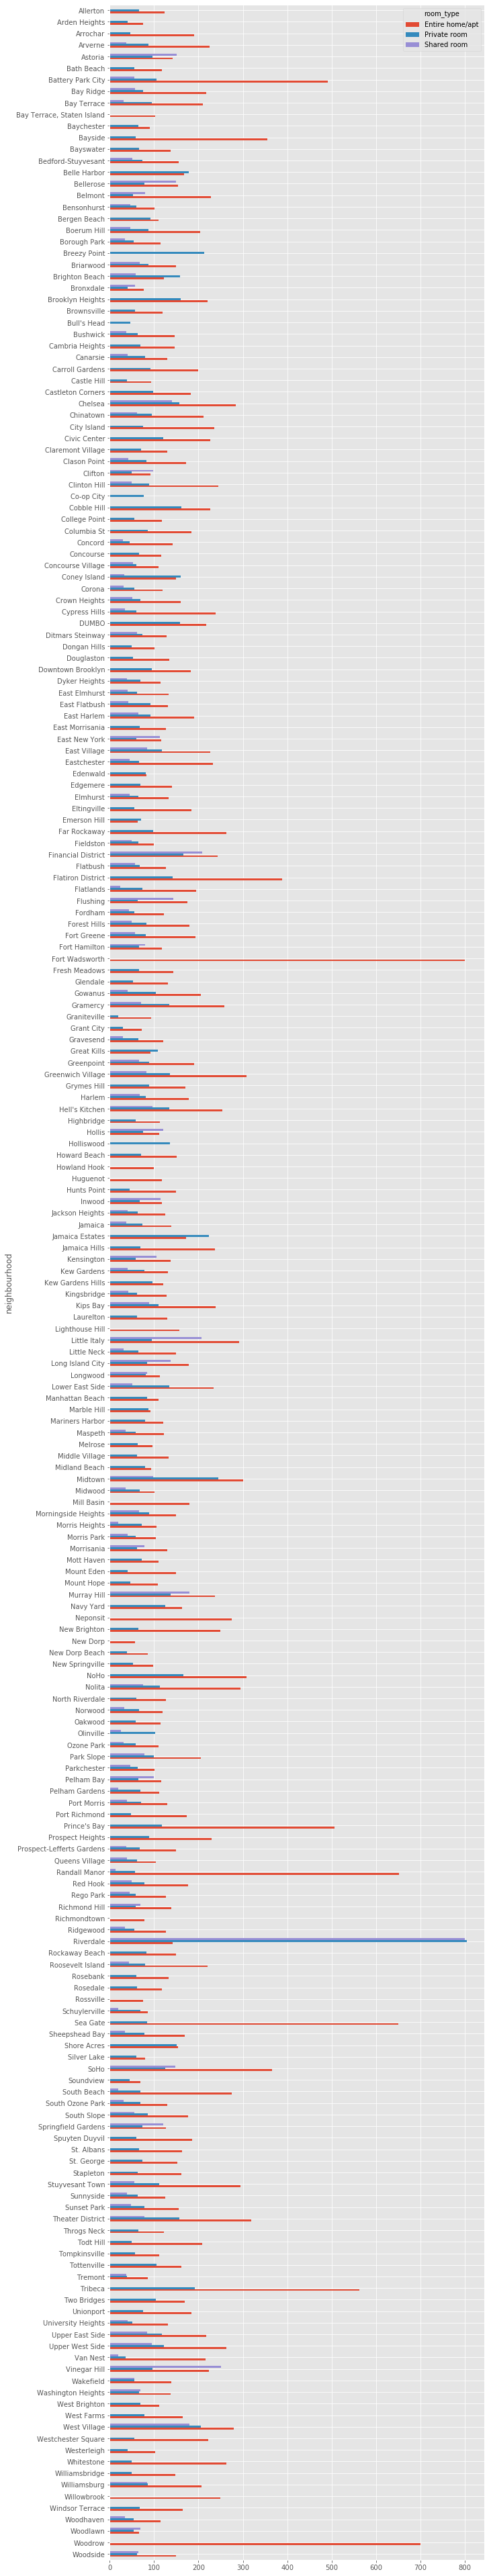

In [90]:
tab2 = pd.crosstab(data['neighbourhood'],data['room_type'], aggfunc='mean', values=data['price'])
tab2.sort_values('neighbourhood', ascending=False).plot(kind='barh', figsize=(10,70))

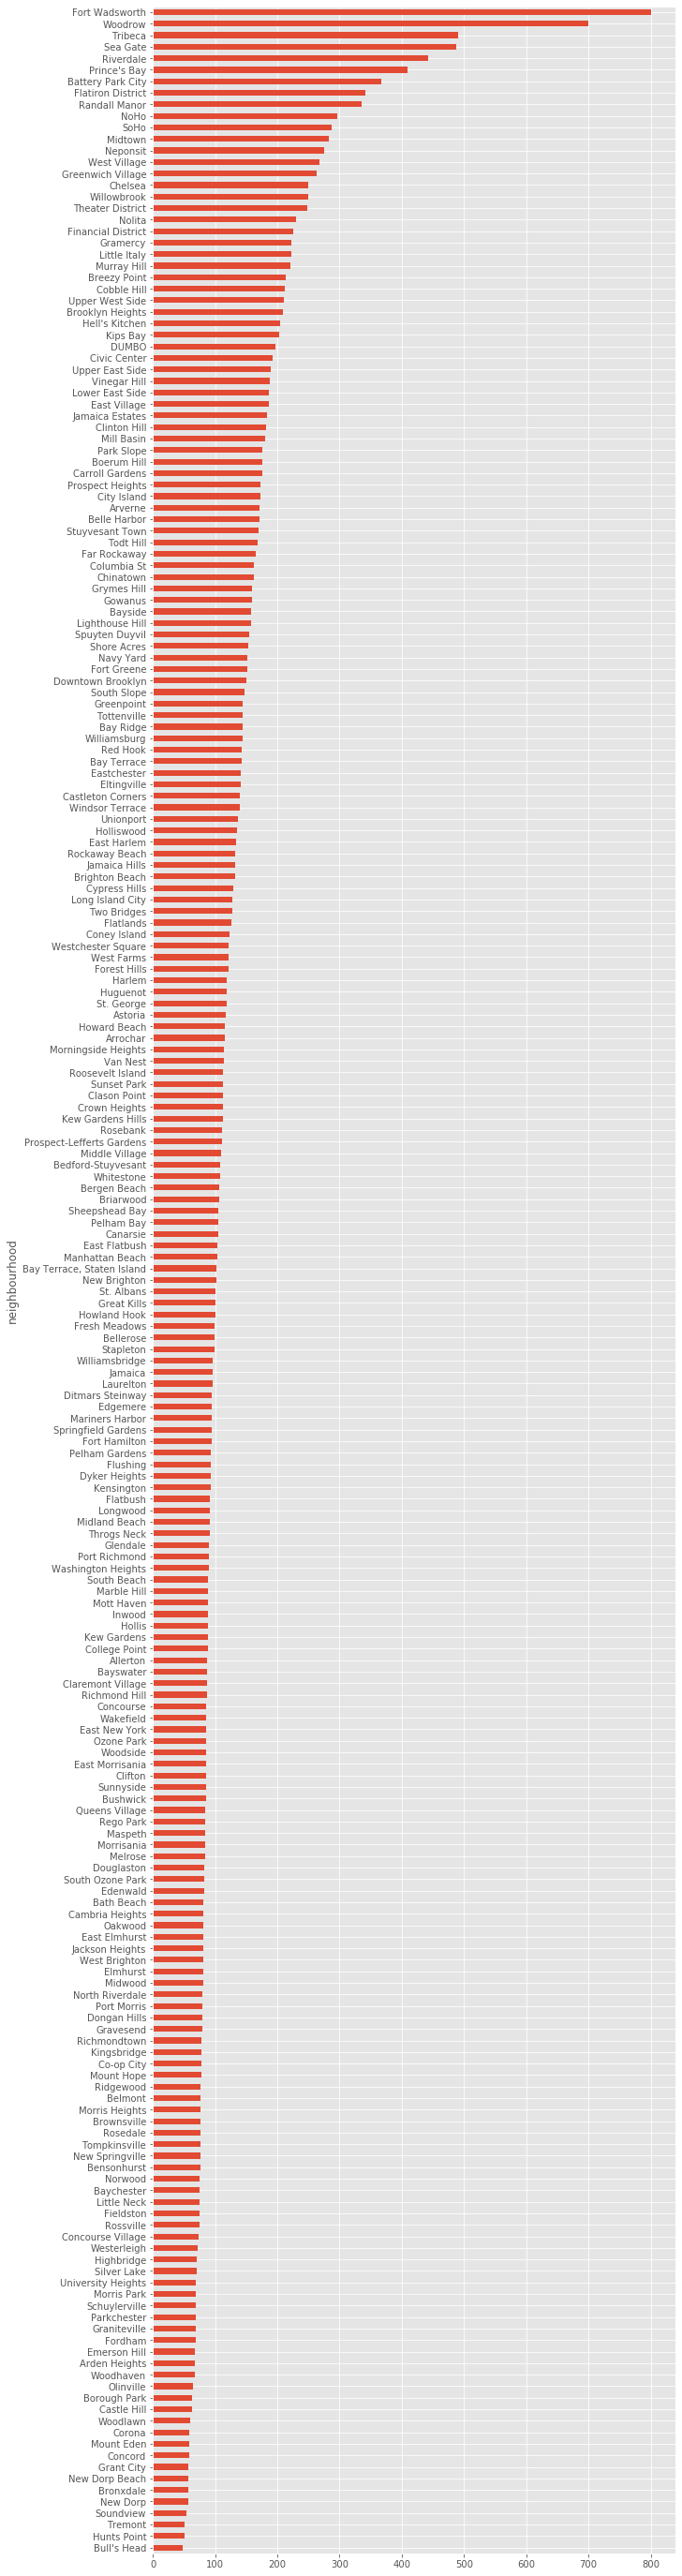

In [71]:
plt.figure(figsize=(10,50))
data['price'].groupby(data['neighbourhood']).mean().sort_values().plot(kind='barh')

In [ ]:
# Itemset mining
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Setup data
...

apriori(data, min_support=5/len(data), use_colnames=True)

In [ ]:
# PCA
from sklearn.decomposition import PCA

In [ ]:
# One hot encoding & more cleanup

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(..., ..., test_size = 0.30, random_state = 0)

NNeighbors = 10
model = KNeighborsClassifier(n_neighbors = NNeighbors)
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))

print(acc)